# Extraindo dados com Beautiful Soup

Neste artigo será utilizada a biblioteca Beautiful Soup para extrair dados da web. Serão extraídos dados sobre os candidatos a prefeito de três cidades, São Paulo, Rio de Janeiro e Belo Horizonte. Os dados podem ser acessados no site: https://politica.estadao.com.br/eleicoes/2020/candidatos

Serão extraídas as seguintes informações:
<ol>
    <li>Nome do candidato</li>
    <li>Partido do candidato</li>
    <li>O estado</li>
    <li>A cidade</li>
    <li>O endereço de link do candidato</li>

### Importando bibliotecas necessárias

In [47]:
import requests # Realizar requests html
from bs4 import BeautifulSoup
import re # Expressões regulares

### Extraindo dados dos candidatos

Para extrair dados de um website, podemos utilizar a biblioteca requests.

In [48]:
# fazendo requisição ao link que contém as informações dos candidatos.
r = requests.get("https://politica.estadao.com.br/eleicoes/2020/candidatos")

In [49]:
# exibe o conteúdo da variável em forma de texto
r.text

'<!DOCTYPE html><html lang="pt-BR"><head><script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\': new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0], j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src= \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f); })(window,document,\'script\',\'dataLayerEstadao\',\'GTM-M4LH38R\');</script><meta charset="UTF-8"/><script async=\'async\' src=\'https://www.googletagservices.com/tag/js/gpt.js\'></script><script async=\'async\' src="https://statics.estadao.com.br/s2016/utils/publicidade/dfp.min.js"></script> <script type=\'text/javascript\'> var DFP = DFP || {}; DFP.cmd = DFP.cmd || []; DFP.cmd.push(function(){DFP.Prebid.init({ "bids": [{ "accepted_formats": [{ "devices": ["xl", "lg", "md", "sm", "xs"], "format": [300, 250], "params": { "networkId": 5963 } }, { "devices": ["xl", "lg", "md"], "format": [970, 90], "params": { "networkId": 5963 } }, { "devices": 

Analisando o conteúdo extraído, nota-se que foi obtido todo o conteúdo HTML da página, o que dificulta a análise e extração dos dados desejados. Neste caso, o beautiful soup irá auxiliar a encontrar os dados desejados na página.

In [50]:
# criando objeto soup que recebe o texto do request
soup = BeautifulSoup(r.text, "html.parser")
type(soup)

bs4.BeautifulSoup

Com o objeto do tipo soup criado, é possível agora realizar uma varredura no HTML, e assim, extrair seu conteúdo.

Dessa forma, o próximo passo é analisar o conteúdo da página, buscando a Tag HTML que possui as informações dos candidatos. Essa tarefa pode ser feita através da ferramenta de desenvolvedor em navegadores que suportam essa função, como o Google Chrome ou o Edge.

Com a página aberta no navegador, podemos escolher a imagem de um candidato e inspecioná-las para identificar a tag que contém as informações.

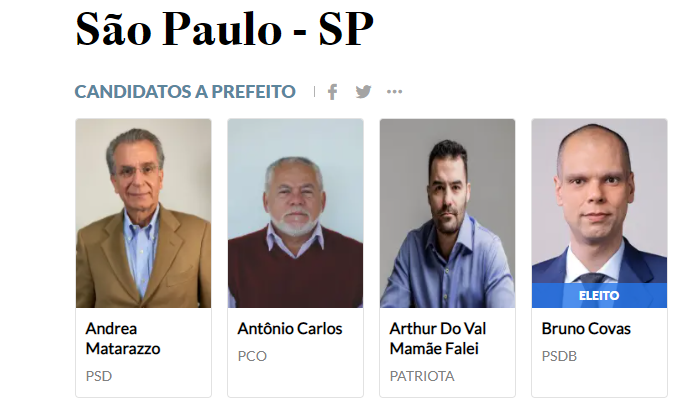
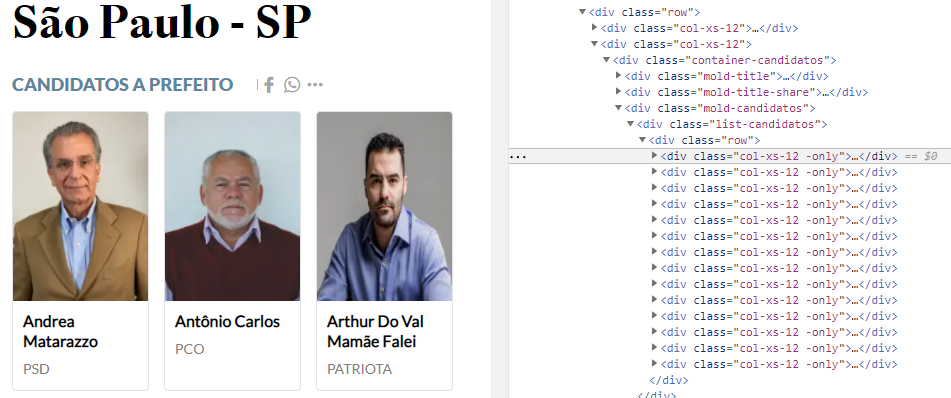

Uma vez identificada as tags, podemos aplicar o Beautiful Soup.

In [51]:
# o método .find_all() busca entre os decendentes de uma tag e retorna todos os decendentes que correspondem a seus filtros.
# aqui está sendo buscada a tag Div pelo filtro class col-xs-12 -only.
candidatos = soup.find_all("div", attrs={"class": "col-xs-12 -only"})

In [52]:
type(candidatos)

bs4.element.ResultSet

O método traz uma lista do tipo Beautiful Soup de tags de cada candidato. Assim é possível exibir os itens dentro da lista.

In [53]:
candidatos[:3]

[<div class="col-xs-12 -only"> <a href="https://politica.estadao.com.br/eleicoes/2020/candidatos/sp/sao-paulo/prefeito/andrea-matarazzo,55" title="andrea matarazzo"> <div class="mold-cand"> <div class="cand-mask"> <img alt="andrea matarazzo" class="elazy" data-src="https://img.estadao.com.br/fotos/politica/eleicoes-2020/SP/FSP250000661535_div.jpg" onerror="this.onerror=null;this.src='https://statics.estadao.com.br/s2016/portal/eleicoes2020/img/img_placeholder.png';"/> </div> <div class="cand-desc"> <h3 class="cand-name">andrea matarazzo</h3> <span class="cand-partido">PSD</span> </div> </div> </a> </div>,
 <div class="col-xs-12 -only"> <a href="https://politica.estadao.com.br/eleicoes/2020/candidatos/sp/sao-paulo/prefeito/antonio-carlos,29" title="antônio carlos"> <div class="mold-cand"> <div class="cand-mask"> <img alt="antônio carlos" class="elazy" data-src="https://img.estadao.com.br/fotos/politica/eleicoes-2020/SP/FSP250001172314_div.jpg" onerror="this.onerror=null;this.src='https:

Analisando o resultado, nota-se as informações de cada candidato dentro dos elementos das tags, e que os candidatos estão separados por vírgulas. Agora é possível iniciar a extração dos dados.

Para isso deve ser identificado qual tag contém cada dado e indicá-las.

In [54]:
# Extraindo o nome do candidato utilizando a TAG "img"
nome_candidato = candidatos[1].img["alt"] # traz o primeiro elemento da lista

# Extraindo o nome do candidato utilizando a TAG "a"
nome_candidato2 = candidatos[1].a["title"]

print(nome_candidato)
print(nome_candidato2)

antônio carlos
antônio carlos


In [55]:
# Extraindo o partido dos candidatos
partido = candidatos[1].span.text
print(partido)

PCO


As informações de estado e cidade estão dentro da TAG "a" que é um link de acesso. Exibindo o conteúdo dessa TAG, nota-se que os dados estão separados por barras "/". Serão utilizadas expressões regulares e o comando split para separar as palavras e armazená-las em um vetor.

In [56]:
# Exbindo conteúdo da Tag "a"
print(candidatos[1].a["href"])

https://politica.estadao.com.br/eleicoes/2020/candidatos/sp/sao-paulo/prefeito/antonio-carlos,29


In [57]:
print(re.split('/', candidatos[1].a["href"]))

['https:', '', 'politica.estadao.com.br', 'eleicoes', '2020', 'candidatos', 'sp', 'sao-paulo', 'prefeito', 'antonio-carlos,29']


Esse vetor pode agora ser acessado em uma determinada posição para recuperar a informação desejada. No caso, a posição 6 e 7 indicam o estado e a cidade.

In [58]:
estado = re.split('/', candidatos[1].a["href"])[6]
cidade = re.split('/', candidatos[1].a["href"])[7]
link = candidatos[1].a["href"]
print(estado, cidade, link)

sp sao-paulo https://politica.estadao.com.br/eleicoes/2020/candidatos/sp/sao-paulo/prefeito/antonio-carlos,29


Sabendo agora como extrair os dados desejados, será criado uma estrutura que percorre toda a lista de candidatos e extrai seus dados, criando uma lista que contem os dados de todos os candidatos.

In [62]:
#cria uma lista vazia
lista_candidatos = []
for candidato in candidatos:
    dados_candidato = [] # Cria uma lista vazia dos dados de cada candidato
    dados_candidato.append(candidato.img["alt"]) # nome
    dados_candidato.append(candidato.span.text) # partido
    dados_candidato.append(re.split('/', candidato.a["href"])[6]) # estado
    dados_candidato.append(re.split('/', candidato.a["href"])[7]) # cidade
    dados_candidato.append(candidato.a["href"]) # link
    lista_candidatos.append(dados_candidato) # Salva os dados completos de um candidato na lista

In [63]:
lista_candidatos[:2]

[['andrea matarazzo',
  'PSD',
  'sp',
  'sao-paulo',
  'https://politica.estadao.com.br/eleicoes/2020/candidatos/sp/sao-paulo/prefeito/andrea-matarazzo,55'],
 ['antônio carlos',
  'PCO',
  'sp',
  'sao-paulo',
  'https://politica.estadao.com.br/eleicoes/2020/candidatos/sp/sao-paulo/prefeito/antonio-carlos,29']]

### Criando um dataframe

Com os dados coletados e adicionados a uma lista, deve-se agora criar um dataframe para tratá-los adequadamente.

In [71]:
import pandas as pd

In [115]:
# Criando dataframe e definido as colunas
df_candidatos = pd.DataFrame(lista_candidatos, columns=['nome_candidato', 'partido', 'estado', 'cidade', 'link'])

In [116]:
df_candidatos.head()

,nome_candidato,partido,estado,cidade,link
0,andrea matarazzo,PSD,sp,sao-paulo,https://politica.estadao.com.br/eleicoes/2020/...
1,antônio carlos,PCO,sp,sao-paulo,https://politica.estadao.com.br/eleicoes/2020/...
2,arthur do val mamãe falei,PATRIOTA,sp,sao-paulo,https://politica.estadao.com.br/eleicoes/2020/...
3,bruno covas,PSDB,sp,sao-paulo,https://politica.estadao.com.br/eleicoes/2020/...
4,celso russomanno,REPUBLICANOS,sp,sao-paulo,https://politica.estadao.com.br/eleicoes/2020/...


 ### Tratando os dados
 
Analisando o dataframe, nota-se que alguns dados de texto não estão dentro do esperado, como o nome dos candidatos que estão em letras minúsculas, os nomes das cidades que estão separados com um hífem e a falta de acentuação.

In [125]:
# Trocando por letras maiúsculas, removendo o hífem e adicionando acentuação nas cidades aos nomes das cidades
df_candidatos['cidade'] = df_candidatos['cidade'].str.upper().str.replace('-', ' ').str.replace('SAO', 'SÃO')


In [126]:
# Trocando os nomes dos candidatos por letras maiúsculas
df_candidatos['nome_candidato'] = df_candidatos['nome_candidato'].str.upper()

In [130]:
# Trocando os estados para letras maiúsculas
df_candidatos['estado'] = df_candidatos['estado'].str.upper()

### Verificando coleta de dados

In [133]:
df_candidatos

,nome_candidato,partido,estado,cidade,link
0,ANDREA MATARAZZO,PSD,SP,SÃO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
1,ANTÔNIO CARLOS,PCO,SP,SÃO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
2,ARTHUR DO VAL MAMÃE FALEI,PATRIOTA,SP,SÃO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
3,BRUNO COVAS,PSDB,SP,SÃO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
4,CELSO RUSSOMANNO,REPUBLICANOS,SP,SÃO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
5,GUILHERME BOULOS,PSOL,SP,SÃO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
6,JILMAR TATTO,PT,SP,SÃO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
7,JOICE HASSELMANN,PSL,SP,SÃO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
8,LEVY FIDELIX,PRTB,SP,SÃO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
9,MARINA HELOU,REDE,SP,SÃO PAULO,https://politica.estadao.com.br/eleicoes/2020/...
